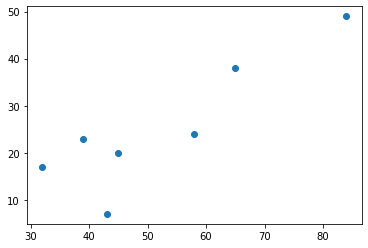

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
n=[32,45,39,43,58,84,65]
d=[17,20,23,7,24,49,38]
plt.scatter(n,d)

In [2]:
 np.correlate(n,d)


array([10620])

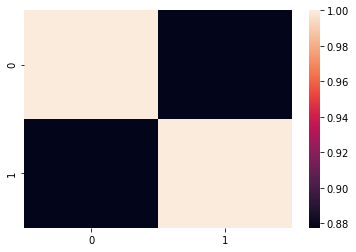

In [3]:
#import seaborn as sns
x =np.corrcoef(n,d)
sns.heatmap(x )

plt.show()

In [18]:
print np.corrcoef(n,d)
np.corrcoef(n,d)[0,1]

[[1.         0.87755261]
 [0.87755261 1.        ]]


0.8775526144641614

In [7]:
np.corrcoef(d,n)

array([[1.        , 0.87755261],
       [0.87755261, 1.        ]])

In [50]:
x = [74,73,65,75,68,72,69,71,83,68,68,73]
y = [75,83,69,77,71,77,68,76,84,69,71,75]
n=[]
print np.corrcoef(x,y)
print np.cov(x,y)
for i in range(len(x)):
       x[i] = x[i] + 10
for i in range(len(y)):
       y[i] = y[i] + 10        
print x,'\n',y
print np.corrcoef(x,y)
print np.cov(x,y)
#cov and corr doesn't change if values are incremented

[[1.         0.84460453]
 [0.84460453 1.        ]]
[[21.90151515 20.81060606]
 [20.81060606 27.71969697]]
[84, 83, 75, 85, 78, 82, 79, 81, 93, 78, 78, 83] 
[85, 93, 79, 87, 81, 87, 78, 86, 94, 79, 81, 85]
[[1.         0.84460453]
 [0.84460453 1.        ]]
[[21.90151515 20.81060606]
 [20.81060606 27.71969697]]


In [29]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [36]:
data.isnull().any()


TV           False
radio        False
newspaper    False
sales        False
dtype: bool

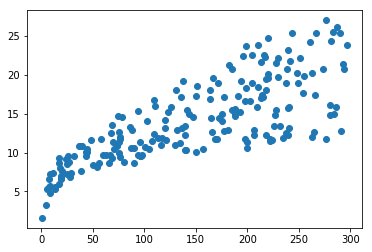

In [55]:
df1 = data['TV']
df2 = data['sales']
df3 = data['newspaper']
df4 = data['radio']
plt.scatter(df1,df2)

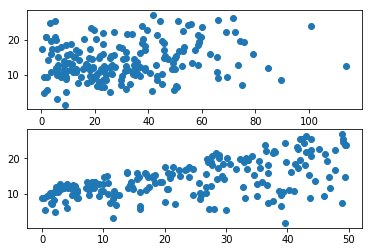

In [56]:
plt.subplot(2,1,1)
plt.scatter(df3,df2)
plt.subplot(2,1,2)
plt.scatter(df4,df2)

In [57]:
print (df3[df3>100])

17     114.0
102    100.9
Name: newspaper, dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0xf88f5f8>],
 'caps': [<matplotlib.lines.Line2D at 0xf88fd30>,
 'fliers': [<matplotlib.lines.Line2D at 0xf751748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf751400>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf88f6a0>,
  <matplotlib.lines.Line2D at 0xf88f9e8>]}

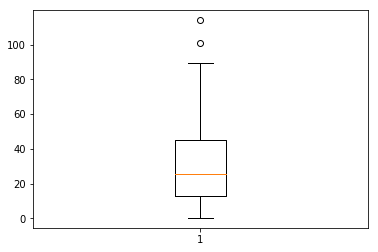

In [58]:
plt.boxplot(df3)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


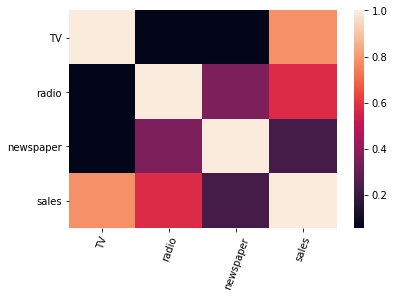

In [19]:
import seaborn as sns
cor = data.corr()
print cor
sns.heatmap (cor , xticklabels = cor.columns.values, yticklabels = cor.columns.values)
plt.yticks(rotation = 0)
plt.xticks(rotation = 70)
plt.show()

In [43]:
45.100000 - 12.750000

32.35

In [46]:
uh = 45.100000 + (1.5 *32.35)
print uh

93.625


In [59]:
 print (df3[df3>93.625])

17     114.0
102    100.9
Name: newspaper, dtype: float64


In [77]:
df3_no_outliers = df3[df3<93.625]
df3_no_outliers.shape 

(198L,)

In [68]:
print df2[17] 

12.5


In [70]:
print df2[102]

23.8


In [30]:
q1=data['newspaper'].quantile(0.25)
q3=data['newspaper'].quantile(0.75)
iqr=q3-q1
iqr
uh=(q3+1.5*iqr)
data_or=data[(data['newspaper']<uh)]
print data_or.shape,data.shape


(198, 4) (200, 4)


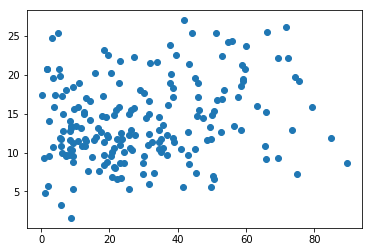

In [85]:
plt.scatter (data_or['newspaper'],data_or['sales'])

In [48]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# sklearn expects 2D array so have to reshape x to (-1,1)which gives 2d array of linear dimension incase we have 1D
regr.fit(data_or[['TV',"newspaper",'radio']],data_or['sales']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
data_or['sales_pred'] = regr.predict(data_or[['TV',"newspaper",'radio']])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_or['residuals'] = data_or['sales'] - data_or['sales_pred']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


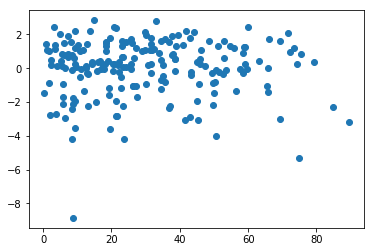

In [34]:
plt.scatter(data_or['newspaper'],data_or['residuals'])
#plt.ylim(-0.05,0.05)
#data_or['residuals']

(array([0.00432993, 0.        , 0.        , 0.01298978, 0.03030948,
        0.0822686 , 0.10391823, 0.25979557, 0.26412549, 0.0995883 ]),
 array([-8.8406447 , -7.67422639, -6.50780809, -5.34138978, -4.17497148,
        -3.00855317, -1.84213487, -0.67571656,  0.49070174,  1.65712005,
         2.82353836]),
 <a list of 10 Patch objects>)

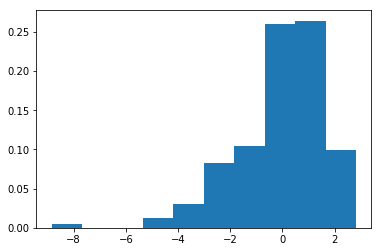

In [35]:
plt.hist (data_or['residuals'],normed = True)

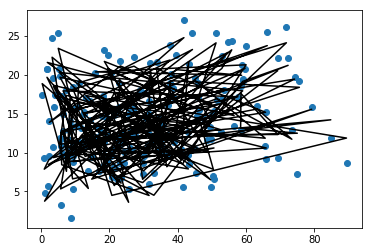

In [25]:

ax1 = plt.axes()
ax1.scatter (data_or['newspaper'],data_or['sales'])
ax1.plot(data_or['newspaper'],data_or['sales_pred'],color = 'black')

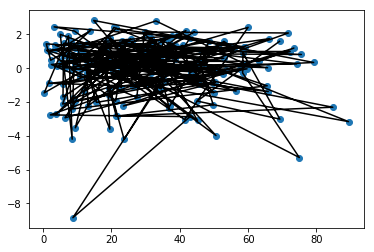

In [66]:
ax1 = plt.axes()
ax1.scatter (data_or['newspaper'],data_or['residuals'])
ax1.plot(data_or['newspaper'],data_or['residuals'],color = 'black')

In [45]:
x = np.arange(20,50,1)
print x

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49]


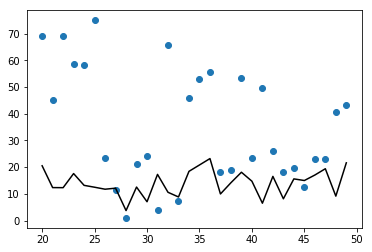

In [53]:
ax1 = plt.axes()
ax1.scatter (x,data_or.iloc[0:30,2])
ax1.plot(x,data_or.iloc[0:30,4],color = 'black')

In [9]:
np.random.seed(20)
x = np.arange(20)
for xx in range(20):
    y[xx] = [xx*2 + np.random.rand(1)*4]
print x,y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [[array([2.3525232])], [array([5.59085491])], [array([7.56612292])], [array([9.26334991])], [array([8.14355834])], [array([12.76703033])], [array([13.51472377])], [array([16.07404378])], [array([18.63180586])], [array([18.77540087])], [array([21.08926561])], [array([24.87442373])], [array([27.13201444])], [array([29.40131056])], [array([31.10097958])], [array([30.14665723])], [array([32.46677494])], [array([37.0051228])], [array([36.95687286])], [array([39.01922406])]]


In [2]:
from sklearn.datasets import load_boston 

X,y = load_boston(return_X_y=True)
print (X.shape,y.shape)

(506, 13) (506,)


In [21]:
import pandas as pd 
data = pd.DataFrame(X)
data['target'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


               0         1         2         3         4         5         6  \
0       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
1      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
2       0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
3      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
4       0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
5      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
6       0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
7      -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
8       0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
9       0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
10      0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
11     -0.385064  0.175520 -0.356977  0.

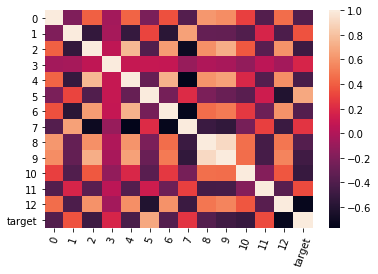

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = data.corr()
print (cor)
sns.heatmap (cor , xticklabels = cor.columns.values, yticklabels = cor.columns.values)
plt.yticks(rotation = 0)
plt.xticks(rotation = 70)
plt.show()

In [41]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(data.iloc[0:400,0:13],data['target'][0:400])
y = model.predict(data.iloc[400:,0:13])


In [43]:
data['residuals'] = data['target'][400:] - y

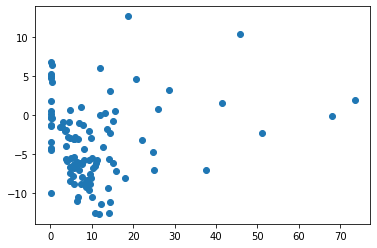

In [52]:
plt.scatter(data[0],data['residuals'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.02973241, 0.05203172, 0.10034689, 0.05574827, 0.07433103,
        0.03716551, 0.02229931, 0.01486621, 0.        , 0.0074331 ]),
 array([-12.67620623, -10.1378417 ,  -7.59947716,  -5.06111263,
         -2.5227481 ,   0.01561643,   2.55398096,   5.0923455 ,
          7.63071003,  10.16907456,  12.70743909]),
 <a list of 10 Patch objects>)

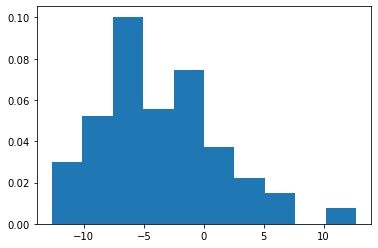

In [59]:
plt.hist(data['residuals'],normed = True)

In [49]:
print(model.coef_,model.intercept_)

[-1.91246374e-01  4.42289967e-02  5.52207977e-02  1.71631351e+00
 -1.49957220e+01  4.88773025e+00  2.60921031e-03 -1.29480799e+00
  4.84787214e-01 -1.54006673e-02 -8.08795026e-01 -1.29230427e-03
 -5.17953791e-01] 28.672599590855874


In [58]:
import statsmodels.api as sm
mod = sm.OLS(data['target'],data.iloc[0:,0:13]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 28 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:03:36   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0929      0.034     -2.699      0.007      -0.161      -0.025
1              0.0487      0.014      3.382      0.001       0.020       0.077
2             -0.0041      0.064     -0.063      0.950      -0.131       0.123
3              2.8540      0.904      3.157      0.002       1.078       4.630
4             -2.8684      3.359     -0.854      0.394      -9.468       3.731
5              5.9281      0.309     19.178      0.000       5.321       6.535
6             -0.0073      0.014     -0.526      0.599      -0.034       0.020
7             -0.9685      0.196     -4.951      0.000      -1.353      -0.584
8              0.1712      0.067      2.564      0.011       0.040       0.302
9             -0.0094      0.004     -2.395      0.017      -0.017      -0.002
10            -0.3922      0.110     -3.570      0.000      -0.608      -0.176
11             0.0149      0.003      5.528      0.000       0.010       0.020
12            -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from sklearn import linear_model 
model_lasso = linear_model.Lasso()
model_lasso.fit(data.iloc[0:400,0:13],data['target'][0:400])
y = model.predict(data.iloc[400:,0:13])

In [61]:
from sklearn import linear_model
model_ridge = linear_model.Ridge()
model_lasso.fit(data.iloc[0:400,0:13],data['target'][0:400])
y_ridge = model.predict(data.iloc[400:,0:13])